"""
Stable Diffusion for Text-to-Image Generation
-------------------------------------------

Introduction:
Stable Diffusion is a state-of-the-art text-to-image generation model that converts textual descriptions
into highly detailed images. It works through a process called denoising diffusion, where:
1. Random noise is gradually transformed into an image
2. The transformation is guided by the text prompt
3. A combination of U-Net, VAE, and CLIP models work together to ensure the generated image matches the text

This notebook demonstrates:
1. Setting up Stable Diffusion using the Hugging Face Diffusers library
2. Generating a custom image from a text prompt
3. Controlling the generation process through parameters like inference steps and guidance scale

"""

In [1]:
# Installation of Required Libraries
# -------------------------------
# Install the necessary packages: diffusers for the model, transformers for text processing,
# and accelerate for optimized inference
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
# Import Required Libraries
# ----------------------
# Import core dependencies for model loading and image handling
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# Device Selection and Model Loading
# ------------------------------
# Choose between GPU (CUDA) or CPU for inference
# Load the pre-trained Stable Diffusion v1.4 model with appropriate precision
# Select the device: GPU is recommended for faster inference.
device = "cuda" if torch.cuda.is_available() else "cpu"


In [4]:
# Load the pre-trained Stable Diffusion model.
# The model "CompVis/stable-diffusion-v1-4" is used here.
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
# Image Generation Setup
# -------------------
# Define the text prompt and generation parameters
prompt = "A futuristic cityscape at sunset, digital art, highly detailed"

In [6]:
# Parameters explanation:
# num_inference_steps: Controls the refinement level (more steps = more detail but slower)
# guidance_scale: Controls how closely the image follows the prompt
num_inference_steps = 50
guidance_scale = 7.5


In [7]:
# Generate the image.
if device == "cuda":
    # Use mixed precision for faster generation on GPU.
    with torch.autocast("cuda"):
        generated = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale)
else:
    generated = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale)


  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
# Get the generated image (PIL Image).
image = generated.images[0]

In [9]:
# Display the image.
image.show()

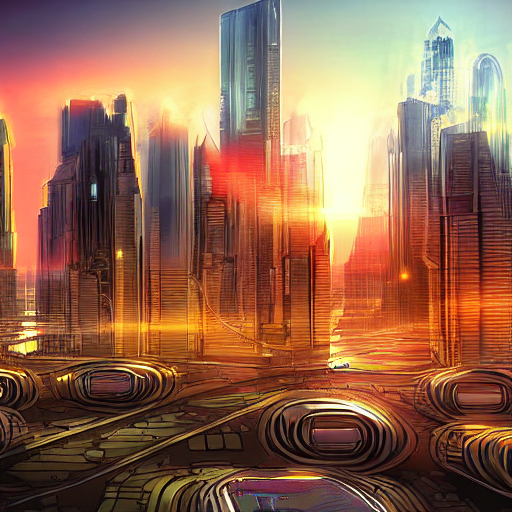

In [11]:
# Additionally, display the image inline if running in a Jupyter Notebook.
if display is not None:
    display(image)

In [12]:
# Optionally, save the image.
image.save("generated_image.png")

"""
Results Analysis:
---------------
The generated image should show a futuristic cityscape with the following characteristics:

1. Content:
   - Urban landscape with futuristic architectural elements
   - Sunset lighting effects
   - Digital art style with high detail level

2. Quality Factors:
   - Using 50 inference steps provides good detail and coherence
   - Guidance scale of 7.5 ensures strong adherence to the prompt while maintaining creativity
   - The model balances realism with artistic interpretation

3. Technical Details:
   - Generation was performed on GPU with mixed precision (float16) for efficiency
   - The complete generation process took several minutes due to the high number of steps
   - The output is a high-resolution image suitable for various applications

The saved image can be found as 'generated_image.png' in your working directory.
"""